In [ ]:

from platform import python_version

print(python_version())

In [ ]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"


In [ ]:

import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

In [ ]:

# Save your API key to track your progress and have access to the quantum computers

your_api_key = ""
your_crn = ""

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="",
    token=your_api_key,
    instance=your_crn,
    name="",
)

In [4]:

import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.9


In [5]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2


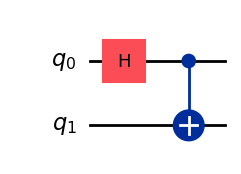

In [6]:

# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

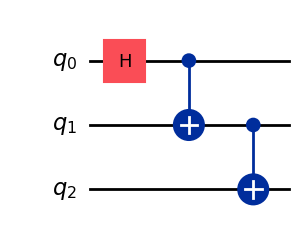

In [ ]:

# Create a new circuit with three qubits
qc = QuantumCircuit(3)

# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubits 0 and 1
qc.cx(0, 1)
# Add a CNOT gate to qubits 1 and 2
qc.cx(1, 2)

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

In [8]:
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


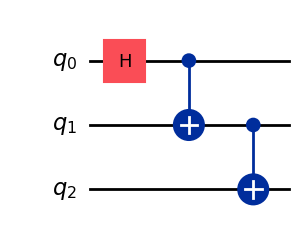

In [ ]:
# Write the coupling map of connections between qubits 0 and 1 and 0 and 2 as a list of pairs: [[0,1],...]
coupling_map = [[0, 1],[0, 2]]

# Transpile the quantum circuit `qc` using the `transpile` function and the coupling map
from qiskit import transpile
qc_transpiled =transpile(qc)

qc_transpiled.draw("mpl")

In [10]:
# Submit your answer using following code
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [11]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

In [12]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

  Outcomes : {'111': 519, '000': 505}


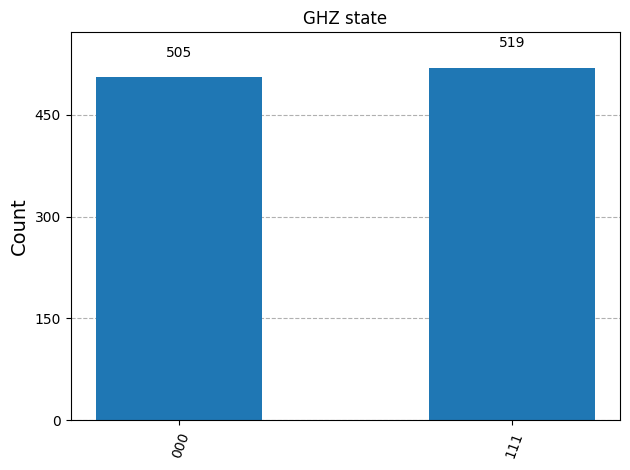

In [13]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(0.025390625)), ('ZZX', np.float64(0.0107421875)), ('ZII', np.float64(0.00439453125)), ('XXI', np.float64(-0.017578125)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


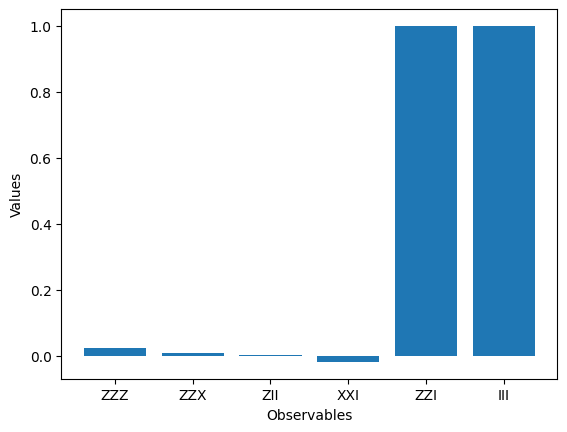

In [14]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [ ]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

In [16]:
# Define the service. This allows you to access IBM QPUs.
service = QiskitRuntimeService(name="qgss-2025")

# Get a backend
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")

We are using the ibm_sherbrooke quantum computer


In [ ]:
# Step 1. Map
# You should have created a GHZ circuit above and assigned with variable `qc`

# Create a new circuit with three qubits
qc = QuantumCircuit(3)

# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubits 0 and 1
qc.cx(0, 1)
# Add a CNOT gate to qubits 1 and 2
qc.cx(1, 2)
# Step 2. Optimize
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
qc_transpiled = transpile(qc)

In [18]:
# Step 3. Execute
sampler = Sampler(mode=backend)
job = sampler.run(pm.run([qc])) 

Outcomes : {'111': 519, '000': 505}


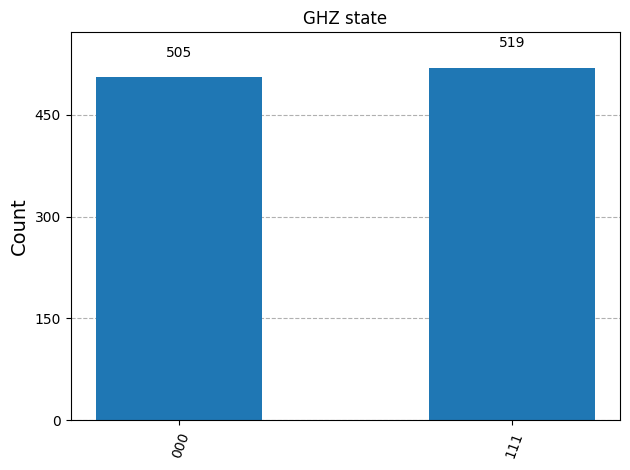

In [ ]:
# Step 4. Post-process
results = job.result()
counts_list = results_sampler[0].data.meas.get_counts()

print(f"Outcomes : {counts_list}")
plot_histogram(counts_list,title='GHZ state')